In [3]:
import numpy as np

In [4]:
# Mapping table
mapping_table = {
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-1j,
    (0,0,1,0) : -3+3j,
    (0,0,1,1) : -3+1j,
    (0,1,0,0) : -1-3j,
    (0,1,0,1) : -1-1j,
    (0,1,1,0) : -1+3j,
    (0,1,1,1) : -1+1j,
    (1,0,0,0) :  3-3j,
    (1,0,0,1) :  3-1j,
    (1,0,1,0) :  3+3j,
    (1,0,1,1) :  3+1j,
    (1,1,0,0) :  1-3j,
    (1,1,0,1) :  1-1j,
    (1,1,1,0) :  1+3j,
    (1,1,1,1) :  1+1j
}

# Character 'a' in binary representation
binary_a = '01100001'

# Initialize the list to store modulated symbols
modulated_symbols = []

# Group binary bits into sets of 4 and perform modulation
for i in range(0, len(binary_a), 4):
    symbol_bits = binary_a[i:i+4]
    symbol = mapping_table.get(tuple(map(int, symbol_bits)), None)
    if symbol is not None:
        modulated_symbols.append(symbol)

# Display the modulated symbols
print("Modulated Symbols for 'a':", modulated_symbols)

Modulated Symbols for 'a': [(-1+3j), (-3-1j)]


In [7]:
# Create a Hermitian matrix from the modulated symbols
hermitian_matrix = []
for i in range(len(modulated_symbols)):
    row = [modulated_symbols[i]]
    if i > 0:
        # Conjugate and append the conjugate of the symbol to create symmetry
        row.append(np.conjugate(modulated_symbols[i]))
    hermitian_matrix.append(row)

# Display the Hermitian matrix
print(hermitian_matrix)

[[(-1+3j)], [(-3-1j), (-3+1j)]]


Bits count:  220
Mean of bits (should be around 0.5):  0.4772727272727273
16 bit groups
[[1 1 0 0]
 [0 0 0 0]
 [1 1 0 0]
 [0 1 0 1]
 [0 0 1 1]
 [0 0 0 0]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 1]
 [1 1 1 0]
 [0 1 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 1 0]
 [1 0 1 0]]
First 16 QAM symbols and bits:
[[1 1 0 0]
 [0 0 0 0]
 [1 1 0 0]
 [0 1 0 1]
 [0 0 1 1]
 [0 0 0 0]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 1]
 [1 1 1 0]
 [0 1 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 1 0]
 [1 0 1 0]]
[ 1.-3.j -3.-3.j  1.-3.j -1.-1.j -3.+1.j -3.-3.j  3.+1.j  1.-1.j  1.+1.j
  1.+3.j -1.-1.j -3.-1.j  3.-3.j -3.-1.j  3.+3.j  3.+3.j]
OFDM data:
[ 3.+3.j  1.-3.j -3.-3.j  1.-3.j -1.-1.j -3.+1.j -3.-3.j  3.+1.j  3.+3.j
  1.-1.j  1.+1.j  1.+3.j -1.-1.j -3.-1.j  3.-3.j -3.-1.j  3.+3.j  3.+3.j
  3.+3.j -3.+3.j -1.-1.j  1.-1.j -3.-1.j -1.+3.j  3.+3.j -1.+1.j -1.+3.j
  1.-1.j  3.-1.j -3.-3.j -3.-3.j  1.-3.j  3.+3.j  1.-3.j -3.+3.j -3.+3.j
 -3.-3.j  3.+3.j  3.+1.j  3.+3.j  3.+3.j  3.-3.j  1.+1.j  3.+3.j -3.-3.j
 -1.+3.j  1.+1.j  3.

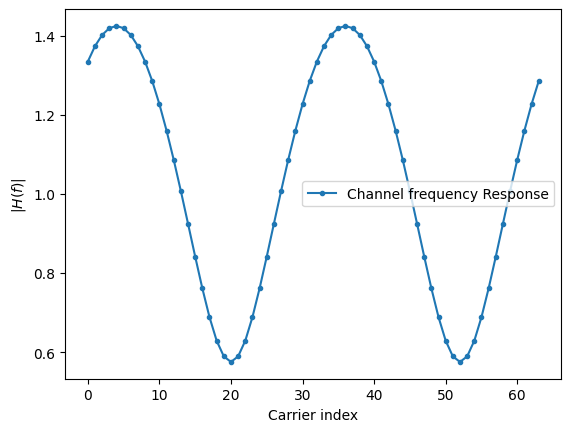

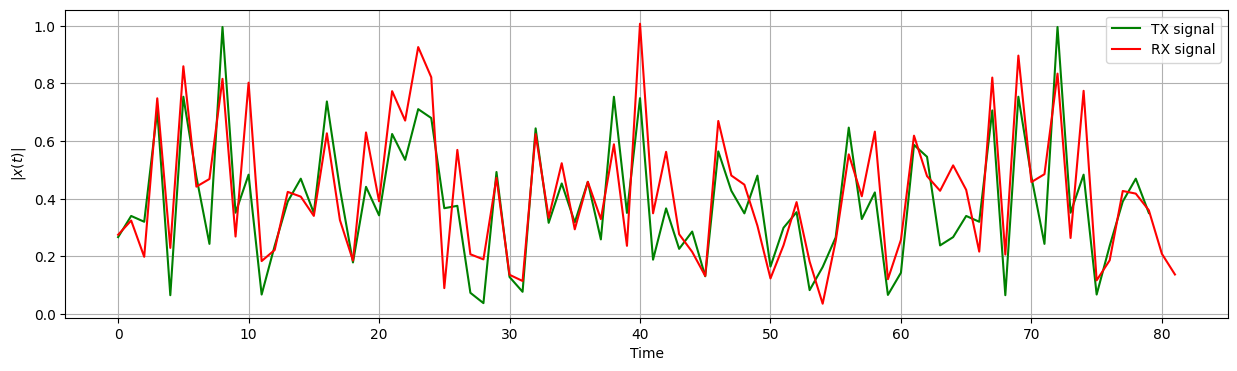

In [18]:
# -*- coding: utf-8 -*-
"""16_QAM_OFDM.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1p02O3gaIotT7xNf7PQjuLlHTbLum41h-
"""

import numpy as np
import scipy.interpolate
import scipy
import matplotlib.pyplot as plt

K = 64 # number of OFDM subcarriers
CP = K//4 #print(CP);  # length of the cyclic prefix: 25% of the block
P = CP//2 # number of pilot carriers per OFDM block
pilotValue = 3+3j # The known value each pilot transmits
#print(pilotValue)
allCarriers = np.arange(K)  # indices of all subcarriers ([0, 1, ... K-1])

pilotCarriers = allCarriers[::K//P] # Pilots is every (K/P)th carrier.

# For convenience of channel estimation, let's make the last carriers also be a pilot
pilotCarriers = np.hstack([pilotCarriers, np.array([allCarriers[-1]])])
P = P+1

# data carriers are all remaining carriers
dataCarriers = np.delete(allCarriers, pilotCarriers)

#print ("allCarriers:   %s" % allCarriers)
#print ("pilotCarriers: %s" % pilotCarriers)
#print ("dataCarriers:  %s" % dataCarriers)
#plt.plot(pilotCarriers, np.zeros_like(pilotCarriers), 'bo', label='pilot', markersize=5)
#plt.plot(dataCarriers, np.zeros_like(dataCarriers), 'ro', label='data', markersize=5)


mu = 4 # bits per symbol (i.e. 16QAM)
payloadBits_per_OFDM = len(dataCarriers) * mu  # number of payload bits per OFDM symbol

mapping_table = {
(0,0,0,0) : -3-3j,
(0,0,0,1) : -3-1j,
(0,0,1,0) : -3+3j,
(0,0,1,1) : -3+1j,
(0,1,0,0) : -1-3j,
(0,1,0,1) : -1-1j,
(0,1,1,0) : -1+3j,
(0,1,1,1) : -1+1j,
(1,0,0,0) :  3-3j,
(1,0,0,1) :  3-1j,
(1,0,1,0) :  3+3j,
(1,0,1,1) :  3+1j,
(1,1,0,0) :  1-3j,
(1,1,0,1) :  1-1j,
(1,1,1,0) :  1+3j,
(1,1,1,1) :  1+1j
}
for b3 in [0, 1]:
  for b2 in [0, 1]:
    for b1 in [0, 1]:
      for b0 in [0, 1]:
          B = (b3, b2, b1, b0)
          Q = mapping_table[B]
          #plt.plot(Q.real, Q.imag, 'go')
          #plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')
#plt.plot(Q.real, Q.imag, 'go',label='Correct 16-QAM points')
#plt.legend()
#plt.grid(True)
##plt.ylim(-0.0001,2)        
channelResponse = np.array([1, 0, 0.3+0.3j])  # the impulse response of the wireless channel
# print(channelResponse)
H_exact = np.fft.fft(channelResponse, K)
#plt.plot(allCarriers, abs(H_exact))

SNRdb = 24  # signal to noise-ratio in dB at the receiver 
bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM, ))
print ("Bits count: ", len(bits))
#print ("First 20 bits: ", bits[:64])
print ("Mean of bits (should be around 0.5): ", np.mean(bits))
plt.plot(allCarriers, abs(H_exact),'.-',label='Channel frequency Response')
plt.xlabel('Carrier index'); plt.ylabel('$|H(f)|$'); plt.legend(fontsize=10)


def SP(bits):
  return bits.reshape((len(dataCarriers), mu))

bits_SP = SP(bits)
print ("16 bit groups")
print (bits_SP[:16,:])

def Mapping(bits):
  return np.array([mapping_table[tuple(b)] for b in bits])
QAM = Mapping(bits_SP)
print ("First 16 QAM symbols and bits:")
print (bits_SP[:16,:])
print (QAM[:16])
demapping_table = {v : k for k, v in mapping_table.items()}

def OFDM_symbol(QAM_payload):
  symbol = np.zeros(K, dtype=complex) # the overall K subcarriers
  symbol[pilotCarriers] = pilotValue  # allocate the pilot subcarriers 
  symbol[dataCarriers] = QAM_payload  # allocate the pilot subcarriers
  return symbol
OFDM_data = OFDM_symbol(QAM)
print("OFDM data:")
print(OFDM_data)
print ("Number of OFDM carriers in frequency domain: ", len(OFDM_data))

def IFFT(OFDM_data):
  return np.fft.ifft(OFDM_data)
OFDM_time = IFFT(OFDM_data)
print("OFDM Time:")
print(OFDM_time)
print ("Number of OFDM samples in time-domain before CP: ", len(OFDM_time))

def addCP(OFDM_time):
  cp = OFDM_time[-CP:]               # take the last CP samples ...
  return np.hstack([cp, OFDM_time])  # ... and add them to the beginning
OFDM_withCP = addCP(OFDM_time)
print("OFDM With CP:")
print(OFDM_withCP)
print ("Number of OFDM samples in time domain with CP: ", len(OFDM_withCP))

def channel(signal):
  convolved = np.convolve(signal, channelResponse)
  signal_power = np.mean(abs(convolved**2))
  sigma2 = signal_power * 10**(-SNRdb/10)  # calculate noise power based on signal power and SNR
  print ("RX Signal power: %.4f. Noise power: %.4f" % (signal_power, sigma2))
  # Generate complex noise with given variance
  noise = np.sqrt(sigma2/2) * (np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape))
  return convolved + noise
OFDM_TX = OFDM_withCP
OFDM_RX = channel(OFDM_TX)

print("OFDM_RX:")
print(OFDM_RX)


plt.figure(figsize=(15,4))
plt.plot(abs(OFDM_TX), label='TX signal', color='green')
plt.plot(abs(OFDM_RX), label='RX signal',color='red')
plt.legend(fontsize=10)
plt.xlabel('Time'); plt.ylabel('$|x(t)|$');
plt.grid(True);

# def removeCP(signal):
#   return signal[CP:(CP+K)]
# OFDM_RX_noCP = removeCP(OFDM_RX)

# def FFT(OFDM_RX):
#   return np.fft.fft(OFDM_RX)
# OFDM_demod = FFT(OFDM_RX_noCP)

# def channelEstimate(OFDM_demod):
#   pilots = OFDM_demod[pilotCarriers]  # extract the pilot values from the RX signal
#   Hest_at_pilots = pilots / pilotValue # divide by the transmitted pilot values

#   # Perform interpolation between the pilot carriers to get an estimate
#   # of the channel in the data carriers. Here, we interpolate absolute value and phase 
#   # separately
#   Hest_abs = scipy.interpolate.interp1d(pilotCarriers, abs(Hest_at_pilots), kind='linear')(allCarriers)
#   Hest_phase = scipy.interpolate.interp1d(pilotCarriers, np.angle(Hest_at_pilots), kind='linear')(allCarriers)
#   Hest = Hest_abs * np.exp(1j*Hest_phase)

#   #plt.plot(allCarriers, abs(H_exact), label='Correct Channel')
#   #plt.stem(pilotCarriers, abs(Hest_at_pilots), label='Pilot estimates')
#   #plt.plot(allCarriers, abs(Hest), label='Estimated channel via interpolation')
#   #plt.grid(True); plt.xlabel('Carrier index'); plt.ylabel('$|H(f)|$'); plt.legend(fontsize=10)
#   #plt.ylim(0,2)
#   return Hest

# Hest = channelEstimate(OFDM_demod)

# #print(Hest)

# def equalize(OFDM_demod, Hest):
#   return OFDM_demod / Hest
# equalized_Hest = equalize(OFDM_demod, Hest)

# def get_payload(equalized):
#   return equalized[dataCarriers]


# #QAM_est_before_equ = get_payload(OFDM_demod)
# #plt.plot(QAM_est_before_equ.real, QAM_est_before_equ.imag, 'ro',label='Before Equalization');
# QAM_est = get_payload(equalized_Hest)
# #plt.plot(QAM_est.real, QAM_est.imag, 'bo',label='After Equalization');
# #plt.legend(fontsize=8)

# def Demapping(QAM):
#   # array of possible constellation points
#   constellation = np.array([x for x in demapping_table.keys()])
#   # calculate distance of each RX point to each possible point
#   dists = abs(QAM.reshape((-1,1)) - constellation.reshape((1,-1)))
#   # for each element in QAM, choose the index in constellation 
#   # that belongs to the nearest constellation point
#   const_index = dists.argmin(axis=1)
#   # get back the real constellation point
#   hardDecision = constellation[const_index]
#   # transform the constellation point into the bit groups
#   return np.vstack([demapping_table[C] for C in hardDecision]), hardDecision

# PS_est, hardDecision = Demapping(QAM_est)
# #for qam, hard in zip(QAM_est, hardDecision):
#   #plt.plot([qam.real, hard.real], [qam.imag, hard.imag], 'b-o');
#   #plt.plot(hardDecision.real, hardDecision.imag, 'go')
#   #plt.ylim(-7)

# #print(bits_est)
# def PS(bits):
#   return bits.reshape((-1,))

# bits_est = PS(PS_est)
# #print(bits_est)
# print ("Obtained Bit error rate: ", np.sum(abs(bits-bits_est))/len(bits))

In [17]:
OFDM_RX

array([ 0.19103236+0.74217495j,  0.4031591 -0.38695319j,
        0.02112803-0.04208713j,  0.20169719-0.42031031j,
        0.10144573-0.07363689j,  0.02805373+0.01110605j,
        0.00964313+0.33096414j, -0.2710481 +0.05059764j,
        0.38879066+0.26316167j,  0.00608077-0.04808643j,
        0.06155243+0.19245798j,  0.25311274+0.03206503j,
        0.41154937+0.04339508j,  0.31063702+0.17053404j,
       -0.04837606+0.39581706j,  0.44315855+0.24807491j,
        0.82096475+0.33010899j, -0.15600505+0.28450513j,
        0.07623192+1.17806843j,  0.12924962-0.13630477j,
        0.0938365 +0.28157256j, -0.22715443-0.52316236j,
        0.16755406+0.55415358j, -0.08987192-0.41246467j,
       -0.00575701+0.70370458j,  0.57223436+0.10095441j,
       -0.34888534-0.07586492j, -0.06849628+0.57751801j,
        0.24787144-0.26844304j,  0.01706489+0.34330321j,
        0.16405235-0.46594578j,  0.41009372+0.38027121j,
        0.4868156 +0.51199053j, -0.18940875+0.25805081j,
        0.21900396+0.35542415j,